# From Scratch Implementation and Evaluation of K-Means Clustering

This project implements the K-Means clustering algorithm entirely from scratch
using NumPy for numerical operations. The goal is to understand the internal
working of K-Means, determine the optimal number of clusters using the Elbow
Method, and interpret the final clustering results.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


 ## 1. Synthetic Data Generation

A synthetic dataset is generated using `make_blobs` from `sklearn.datasets`.
This creates a controlled, well-separated dataset that is suitable for testing
the K-Means clustering algorithm.
bs


In [11]:
X, _ = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1.2,
    random_state=42
)

print("Dataset shape:", X.shape)


Dataset shape: (500, 2)


In [12]:
X, _ = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1.2,
    random_state=42
)

print("Dataset shape:", X.shape)


Dataset shape: (500, 2)


## 2. K-Means Implementation From Scratch

The K-Means algorithm is implemented manually using NumPy.
No clustering functions from `sklearn` are used.
The implementation includes:
- Random centroid initialization
- Euclidean distance calculation
- Cluster assignment
- Centroid updates
- Convergence checking


In [13]:
def euclidean_distance(point, centroids):
    return np.sqrt(np.sum((centroids - point) ** 2, axis=1))


### Centroid Initialization

Centroids are initialized randomly by selecting K data points from the dataset.
Random initialization is simple but may affect convergence speed and final results.


In [14]:
def initialize_centroids(X, K):
    np.random.seed(42)
    indices = np.random.choice(len(X), K, replace=False)
    return X[indices]


In [15]:
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = euclidean_distance(point, centroids)
        clusters.append(np.argmin(distances))
    return np.array(clusters)


In [16]:
def update_centroids(X, clusters, K):
    new_centroids = []
    for i in range(K):
        cluster_points = X[clusters == i]
        new_centroids.append(cluster_points.mean(axis=0))
    return np.array(new_centroids)


### Convergence Criterion

The algorithm stops when the change in centroid positions becomes smaller than
a predefined tolerance value, indicating convergence.


In [18]:
def has_converged(old_centroids, new_centroids, tol=1e-4):
    return np.all(np.abs(old_centroids - new_centroids) < tol)
 

In [19]:
def kmeans(X, K, max_iters=100):
    centroids = initialize_centroids(X, K)

    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, K)

        if has_converged(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, clusters


## 3. Elbow Method for Optimal Number of Clusters

The Elbow Method uses the Within-Cluster Sum of Squares (WCSS) to determine
the optimal number of clusters by identifying the point where improvement
begins to diminish.


In [21]:
def calculate_wcss(X, centroids, clusters):
    wcss = 0
    for i in range(len(centroids)):
        points = X[clusters == i]
        wcss += np.sum((points - centroids[i]) ** 2)
    return wcss


In [22]:
wcss_values = []

for k in range(1, 11):
    centroids, clusters = kmeans(X, k)
    wcss = calculate_wcss(X, centroids, clusters)
    wcss_values.append(wcss)
    print(f"K = {k}, WCSS = {wcss:.2f}")


K = 1, WCSS = 34400.44
K = 2, WCSS = 21085.23
K = 3, WCSS = 3803.76
K = 4, WCSS = 1366.40
K = 5, WCSS = 1241.41
K = 6, WCSS = 1187.48
K = 7, WCSS = 1152.13
K = 8, WCSS = 1131.70
K = 9, WCSS = 1004.83
K = 10, WCSS = 943.30


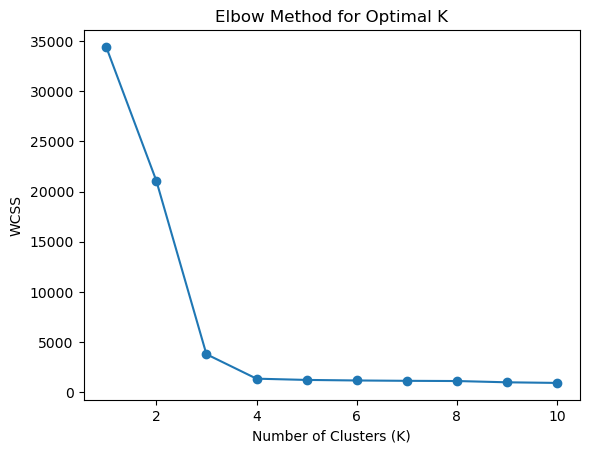

In [23]:
plt.figure()
plt.plot(range(1, 11), wcss_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


From the Elbow Method plot, a sharp decrease in WCSS is observed up to **K = 4**.
Beyond this point, the reduction in WCSS becomes marginal.
Therefore, **K = 4** is selected as the optimal number of clusters.


## 4. Final Clustering Using Optimal K
The K-Means algorithm is executed using the optimal number of clusters (K = 4).


In [24]:
optimal_k = 4
final_centroids, final_clusters = kmeans(X, optimal_k)


In [25]:
print("Final Cluster Centroids:")
for i, c in enumerate(final_centroids):
    print(f"Cluster {i}: {c}")


Final Cluster Centroids:
Cluster 0: [4.73821371 1.91399279]
Cluster 1: [-7.02523244 -6.90932713]
Cluster 2: [-8.65017946  7.48183793]
Cluster 3: [-2.62081897  9.10806483]


In [26]:
print("Sample cluster assignments:")
for i in range(20):
    print(f"Point {i} → Cluster {final_clusters[i]}")


Sample cluster assignments:
Point 0 → Cluster 2
Point 1 → Cluster 1
Point 2 → Cluster 0
Point 3 → Cluster 3
Point 4 → Cluster 1
Point 5 → Cluster 1
Point 6 → Cluster 2
Point 7 → Cluster 1
Point 8 → Cluster 0
Point 9 → Cluster 1
Point 10 → Cluster 0
Point 11 → Cluster 3
Point 12 → Cluster 0
Point 13 → Cluster 3
Point 14 → Cluster 1
Point 15 → Cluster 0
Point 16 → Cluster 3
Point 17 → Cluster 2
Point 18 → Cluster 2
Point 19 → Cluster 3


## 5. Results and Interpretation

The final centroids represent the mean position of data points in each cluster.
The clusters are well-separated, indicating successful convergence of the
K-Means algorithm.



## 6. Implementation Challenges

- Implementing centroid updates efficiently using NumPy
- Ensuring proper convergence without infinite loops
- Sensitivity of K-Means to initial centroid selection
- Selecting the optimal K using the Elbow Method


### Conclusion

This project demonstrates a complete, from-scratch implementation of the
K-Means clustering algorithm. By avoiding built-in clustering libraries,
a deeper understanding of clustering mechanics, convergence behavior,
and model evaluation was achieved.
